# Biodiversity Intactness Analysis for Phoenix Subdivision

## Author: Takeen Shamloo
View full repo: [GitHub Link](https://github.com/takeenshamloo/biodiversity-intactness-phoenix)

## About
### Purpose
This notebook analyzes the Biodiversity Intactness Index (BII) within the Phoenix subdivision for the years 2017 and 2020. It calculates biodiversity loss, visualizes the results, and identifies areas where biodiversity was maintained or declined.

### Highlights
1. Data exploration and masking of biodiversity data.
2. Visualization of BII values for 2017 and 2020.
3. Overlay of biodiversity loss with transparent backgrounds.
4. Calculation of the percentage of area with biodiversity changes.

### About the Data
The BII data was sourced from the Microsoft Planetary Computer and focuses on the Phoenix, AZ area. The dataset provides rasterized BII values for 2017 and 2020.

### References
- Microsoft Planetary Computer. (n.d.). Biodiversity intactness data. Retrieved from https://planetarycomputer.microsoft.com
- GeoPandas contributors. (n.d.). GeoPandas documentation. Retrieved from https://geopandas.org
- Rasterio contributors. (n.d.). Rasterio documentation. Retrieved from https://rasterio.readthedocs.io
- U.S. Census Bureau. (n.d.). Census County Subdivision shapefiles for Arizona. Retrieved from https://www.census.gov/geographies/mapping-files.html
---


In [2]:
# Import required libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask
import numpy as np

# For importing BII Data from Microsoft
from pystac_client import Client
import planetary_computer as pc
import requests

### Code below is used to generate BII Data for 2017/2020
- Should only be ran if needed to generate files again.

## 1. Data Loading and Exploration
### 1.1 Phoenix Subdivision Shapefilez
This section loads the Phoenix subdivision shapefile and filters it to extract the relevant geometry for analysis.

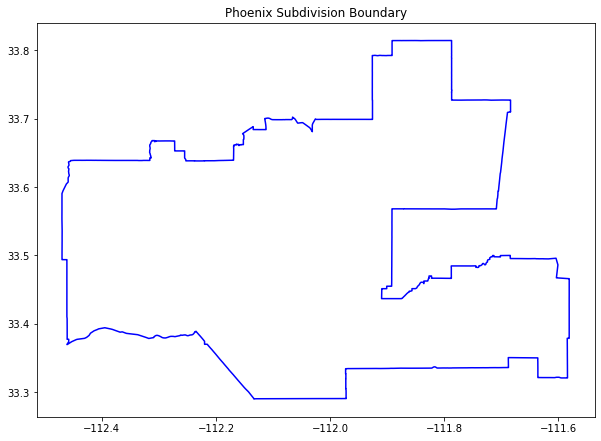

In [3]:
# Load Phoenix subdivision shapefile
shapefile_path = "../data/tl_2020_04_cousub/tl_2020_04_cousub.shp"
county_subdivisions = gpd.read_file(shapefile_path)

# Validate shapefile
assert not county_subdivisions.empty, "Error: Shapefile is empty."

# Filter for Maricopa County and Phoenix subdivision
maricopa_subdivisions = county_subdivisions[county_subdivisions["COUNTYFP"] == "013"]
phoenix_subdivision = maricopa_subdivisions[maricopa_subdivisions["NAME"].str.contains("Phoenix")]

# Validate Phoenix subdivision
assert not phoenix_subdivision.empty, "Error: Phoenix subdivision filter returned no results."

# Plot the Phoenix subdivision for verification
fig, ax = plt.subplots(figsize=(10, 8))
phoenix_subdivision.boundary.plot(ax=ax, edgecolor="blue")
plt.title("Phoenix Subdivision Boundary")
plt.show()

## 1.2 Biodiversity Intactness Index (BII) Rasters

In [4]:
# Load and validate the BII rasters for 2017 and 2020
bii_2017 = rasterio.open("../data/bii_2017.tif")
bii_2020 = rasterio.open("../data/bii_2020.tif")

## 2. Data Masking and Visualization
### 2.1 Masking BII Data
This section calculates the percentage of the Phoenix subdivision area with BII ≥ 0.75 for both 2017 and 2020.